<a href="https://colab.research.google.com/github/emimorgan97/Machine-Learning-Final-Project/blob/main/resize_padding_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gzip
import h5py

# Paths to gzip-compressed HDF5 files
images_file_path = '/content/drive/MyDrive/ML_Data/pcamv1/camelyonpatch_level_2_split_valid_x.h5.gz'
labels_file_path = '/content/drive/MyDrive/ML_Data/pcamv1/camelyonpatch_level_2_split_valid_y.h5.gz'

# Number of images to read in each batch
chunk_size = 50

# Initialize lists to store data
images_data = []
labels_data = []

# Open gzip-compressed HDF5 files and read data in chunks
with gzip.open(images_file_path, 'rb') as f_images, h5py.File(f_images, 'r') as hf_images:
    with gzip.open(labels_file_path, 'rb') as f_labels, h5py.File(f_labels, 'r') as hf_labels:
        num_images = 10000  # set this depending on how many images you want

        for i in range(0, num_images, chunk_size):
            # Read chunk of image data
            images_chunk = hf_images['x'][i:i+chunk_size]
            images_data.extend(images_chunk)

            # Read corresponding chunk of labels data
            labels_chunk = hf_labels['y'][i:i+chunk_size]
            labels_data.extend(labels_chunk)

# Now you have images_data and labels_data containing the data of images and labels, respectively, in chunks.
# You can further process this data as needed.


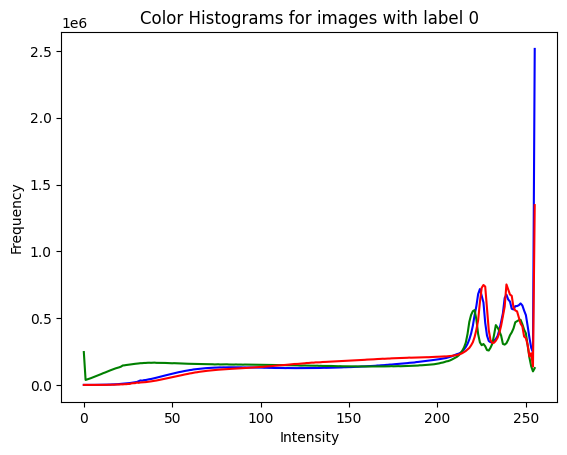

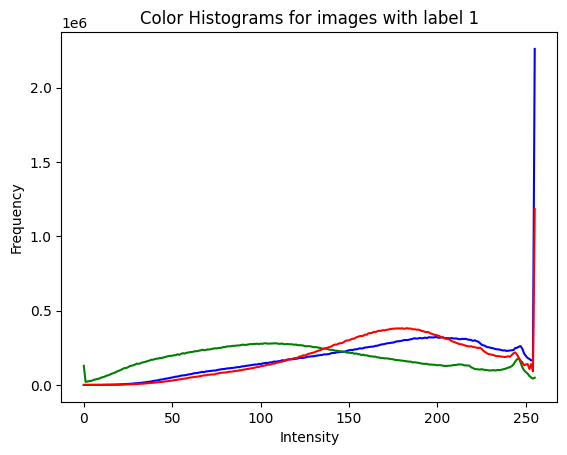

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_color_moments(images_data):
    # Initialize lists to store color moments for each image
    means = []
    std_devs = []
    skewnesses = []
    kurtoses = []

    # Iterate over all images in the dataset
    for image in images_data:
        # Convert image to HSV color space
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Calculate color moments
        moments = cv2.moments(hsv[:,:,1])
        mean = moments['m00']
        std_dev = np.sqrt(moments['m02'] / mean)
        skewness = moments['mu03'] / std_dev**3
        kurtosis = moments['mu20'] * moments['mu02'] - moments['mu11']**2

        # Append color moments to the lists
        means.append(mean)
        std_devs.append(std_dev)
        skewnesses.append(skewness)
        kurtoses.append(kurtosis)

    # Calculate aggregate statistics for each color moment
    mean_mean = np.mean(means)
    mean_std_dev = np.mean(std_devs)
    mean_skewness = np.mean(skewnesses)
    mean_kurtosis = np.mean(kurtoses)

    return mean_mean, mean_std_dev, mean_skewness, mean_kurtosis

def plot_color_histograms(images_data, title):
    # Initialize empty arrays to store histograms
    hist_blue = np.zeros((256,))
    hist_green = np.zeros((256,))
    hist_red = np.zeros((256,))

    # Calculate histogram for each color channel
    for image in images_data:
        hist_blue += cv2.calcHist([image], [0], None, [256], [0,256]).flatten()
        hist_green += cv2.calcHist([image], [1], None, [256], [0,256]).flatten()
        hist_red += cv2.calcHist([image], [2], None, [256], [0,256]).flatten()

    # Plot histograms
    plt.plot(hist_blue, color='blue')
    plt.plot(hist_green, color='green')
    plt.plot(hist_red, color='red')
    plt.title(title)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.show()

def main():
    # Assuming you have a variable called images_data containing all the images as numpy arrays
    # and a variable called labels containing corresponding labels (0 or 1) for each image

    # Separate images based on their labels
    images_data_label_0 = [img for img, label in zip(images_data, labels_data) if label == 0]
    images_data_label_1 = [img for img, label in zip(images_data, labels_data) if label == 1]

    # Plot color histograms for dataset with label 0
    plot_color_histograms(images_data_label_0, 'Color Histograms for images with label 0')

    # Plot color histograms for dataset with label 1
    plot_color_histograms(images_data_label_1, 'Color Histograms for images with label 1')

if __name__ == "__main__":
    main()


In [ ]:
class_0_count = 0
class_1_count = 0

# Iterate through the labels and count occurrences of each class
for label in labels_data:
    if label == 0:
        class_0_count += 1
    elif label == 1:
        class_1_count += 1

# Print the counts
print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 5028
Class 1 count: 4972


In [ ]:
display_images(images_data[:5])

NameError: name 'display_images' is not defined

In [ ]:
class_0_count = 0
class_1_count = 0

# Iterate through the labels and count occurrences of each class
for label in labels_data:
    if label == 0:
        class_0_count += 1
    elif label == 1:
        class_1_count += 1

# Print the counts
print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 5010
Class 1 count: 4990


In [ ]:
import gzip
import h5py
import numpy as np
from PIL import Image

def resize_to_center(image_data, target_size=(32, 32)):
    # Get original image size
    original_size = image_data.shape[:2]
    # Calculate top-left position for the new image
    top = (original_size[0] - target_size[0]) // 2
    left = (original_size[1] - target_size[1]) // 2
    # Crop the original image to the center
    cropped_image = image_data[top:top+target_size[0], left:left+target_size[1], :]
    return cropped_image

# Number of images to process
num_images = len(images_data)  # Assuming images_data contains all the image data

# Resize each image to center 32x32 pixels
resized_images = []
for image_data in images_data:
    resized_image_data = resize_to_center(image_data)
    resized_images.append(resized_image_data)

# Now you have resized_images containing the resized image data.
# You can further process this data as needed.


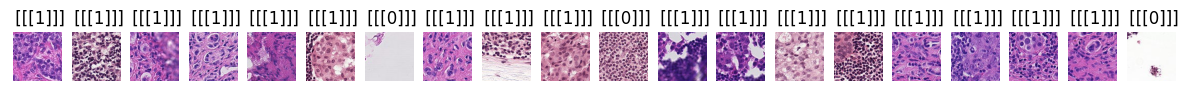

In [ ]:
import matplotlib.pyplot as plt

def display_images(images_data, labels, num_images=20):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images_data[i])
        axes[i].axis('off')
        axes[i].set_title(f" {labels[i]}")  # Add label to the title
    plt.show()

# Example usage:
# Assuming `resized_images` is a list of resized images and `image_labels` is a list of corresponding labels
# Visualize 5 resized images with labels
display_images(images_data, labels_data)

Images labeled as 0:


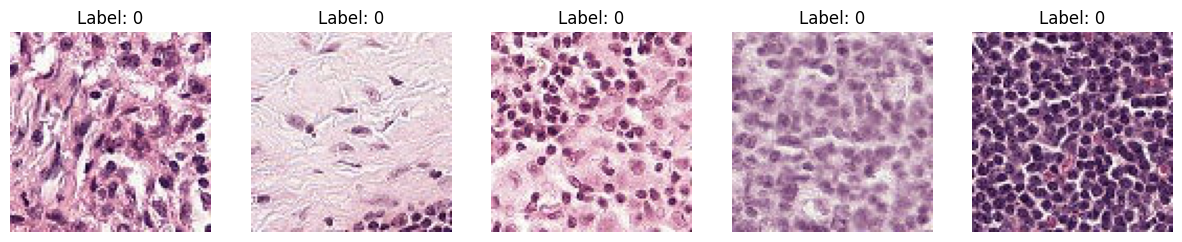

Images labeled as 1:


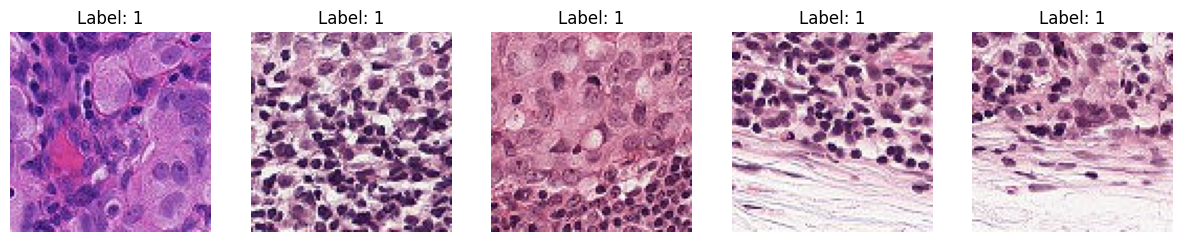

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_images(images_data, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images_data[i])
        axes[i].axis('off')
        axes[i].set_title(f"Label: {labels[i]}")  # Display only label
    plt.show()

# Assuming resized_images is a list of resized images and image_labels is a list of corresponding labels

# Shuffle the data and labels while maintaining correspondence
combined = list(zip(images_data, labels_data))
np.random.shuffle(combined)
shuffled_images, shuffled_labels = zip(*combined)

# Find the first 5 images with label 0 and label 1
label_0_images = []
label_1_images = []
for img, label in zip(shuffled_images, shuffled_labels):
    if label == 0 and len(label_0_images) < 5:
        label_0_images.append(img)
    elif label == 1 and len(label_1_images) < 5:
        label_1_images.append(img)
    if len(label_0_images) == 5 and len(label_1_images) == 5:
        break

# Visualize the first 5 images labeled as 0
print("Images labeled as 0:")
display_images(label_0_images, [0] * 5)

# Visualize the first 5 images labeled as 1
print("Images labeled as 1:")
display_images(label_1_images, [1] * 5)


In [ ]:
# Function to pad images to be of size 96x96
def pad_images(images_data, target_size=(96, 96)):
    padded_images = []
    for image_data in images_data:
        # Calculate padding amounts for each dimension
        pad_height = max(target_size[0] - image_data.shape[0], 0)
        pad_width = max(target_size[1] - image_data.shape[1], 0)

        # Pad the image with zeros
        padded_image = np.pad(image_data, ((0, pad_height), (0, pad_width), (0, 0)), mode='constant')
        padded_images.append(padded_image)
    return padded_images

# Pad resized images to be of size 96x96
padded_images = pad_images(resized_images)

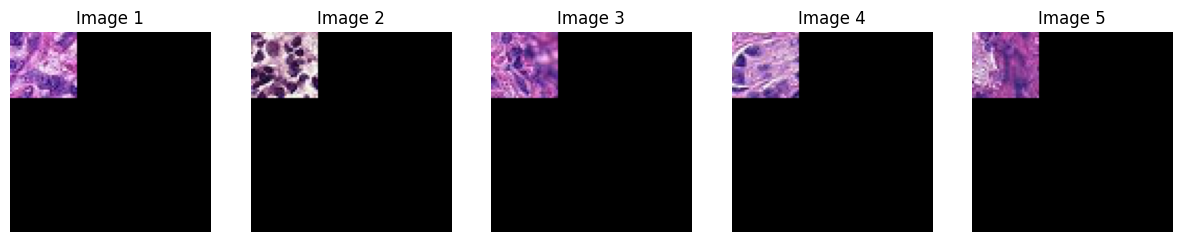

In [ ]:
display_images(padded_images[:5])

In [ ]:
import h5py
import gzip

# Paths for the output HDF5 and gzip files for images and labels
output_images_h5_file_path = '32x_valid.h5'
output_labels_h5_file_path = '32y_valid.h5'
output_images_h5_gz_file_path = '32x_valid.h5.gz'
output_labels_h5_gz_file_path = '32y_valid.h5.gz'

# Create HDF5 file to store padded images
with h5py.File(output_images_h5_file_path, 'w') as output_images_file:
    # Create a dataset to store padded images
    output_images_dataset = output_images_file.create_dataset('images', data=padded_images)

# Create HDF5 file to store labels
with h5py.File(output_labels_h5_file_path, 'w') as output_labels_file:
    # Create a dataset to store labels
    output_labels_dataset = output_labels_file.create_dataset('labels', data=labels_data)

# Gzip the HDF5 file for images
with open(output_images_h5_file_path, 'rb') as f_in:
    with gzip.open(output_images_h5_gz_file_path, 'wb') as f_out:
        f_out.writelines(f_in)

# Gzip the HDF5 file for labels
with open(output_labels_h5_file_path, 'rb') as f_in:
    with gzip.open(output_labels_h5_gz_file_path, 'wb') as f_out:
        f_out.writelines(f_in)

print("Padded images and labels saved to HDF5 files and gzip compressed successfully.")

import shutil
destination_drive_path = '/content/drive/MyDrive/Training Data: Subset 10000 Images'
shutil.copy(output_images_h5_gz_file_path, destination_drive_path)

destination_drive_path = '/content/drive/MyDrive/Training Data: Subset 10000 Images'
shutil.copy(output_labels_h5_gz_file_path, destination_drive_path)

Padded images and labels saved to HDF5 files and gzip compressed successfully.


'/content/drive/MyDrive/Training Data: Subset 10000 Images/32y_valid.h5.gz'

In [ ]:
import h5py
import gzip

# Paths for the output HDF5 and gzip files for images and labels
output_images_h5_file_path = 'x_train.h5'
output_labels_h5_file_path = 'y_train.h5'
output_images_h5_gz_file_path = 'x_train.h5.gz'
output_labels_h5_gz_file_path = 'y_train.h5.gz'

# Create HDF5 file to store padded images
with h5py.File(output_images_h5_file_path, 'w') as output_images_file:
    # Create a dataset to store padded images
    output_images_dataset = output_images_file.create_dataset('images', data=images_data)

# Create HDF5 file to store labels
with h5py.File(output_labels_h5_file_path, 'w') as output_labels_file:
    # Create a dataset to store labels
    output_labels_dataset = output_labels_file.create_dataset('labels', data=labels_data)

# Gzip the HDF5 file for images
with open(output_images_h5_file_path, 'rb') as f_in:
    with gzip.open(output_images_h5_gz_file_path, 'wb') as f_out:
        f_out.writelines(f_in)

# Gzip the HDF5 file for labels
with open(output_labels_h5_file_path, 'rb') as f_in:
    with gzip.open(output_labels_h5_gz_file_path, 'wb') as f_out:
        f_out.writelines(f_in)

import shutil
destination_drive_path = '/content/drive/MyDrive/Training Data: Subset 10000 Images'
shutil.copy(output_images_h5_gz_file_path, destination_drive_path)

destination_drive_path = '/content/drive/MyDrive/Training Data: Subset 10000 Images'
shutil.copy(output_labels_h5_gz_file_path, destination_drive_path)

'/content/drive/MyDrive/Training Data: Subset 10000 Images/y_train.h5.gz'

In [ ]:
import shutil
destination_drive_path = '/content/drive/MyDrive/Training Data: Subset 10000 Images'
shutil.copy(output_images_h5_gz_file_path, destination_drive_path)

destination_drive_path = '/content/drive/MyDrive/Training Data: Subset 10000 Images'
shutil.copy(output_labels_h5_gz_file_path, destination_drive_path)

'/content/drive/MyDrive/Training Data: Subset 10000 Images/32y_test.h5.gz'